# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [11]:
# Rename all the columns to lower case
df.columns = df.columns.str.title().str.strip()
df.columns 

Index(['C/A', 'Unit', 'Scp', 'Station', 'Linename', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits'],
      dtype='object')

Change the index to `'linename'`: 

In [12]:
# Change the index to 'linename'
df.set_index('Linename')

,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits
Linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
...,...,...,...,...,...,...,...,...,...,...
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348


Remove the index: 

In [14]:
# Remove the index
df.reset_index()

,index,C/A,Unit,Scp,Station,Linename,Division,Date,Time,Desc,Entries,Exits
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
...,...,...,...,...,...,...,...,...,...,...,...,...
197620,197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,05:00:00,REGULAR,5554,348
197621,197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,09:00:00,REGULAR,5554,348
197622,197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,13:00:00,REGULAR,5554,348
197623,197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,17:00:00,REGULAR,5554,348


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [31]:
# Add a new 'num_lines' column
df['Num_Lines']=df['Linename'].map(lambda x: len(x))
df.columns[0:5]

Index(['C/A', 'Unit', 'Scp', 'Station', 'Linename'], dtype='object')

Write a function to clean column names: 

In [32]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.lower()
    return cleaned

In [33]:
# Use the above function to clean the column names
df.columns = [clean(x) for x in df.columns]

In [34]:
# Check to ensure the column names were cleaned
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [39]:
# Convert the data type of the 'date' column to a date
df['date']=pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week']=df['date'].dt.day_name()

df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,num_lines,day_of_week
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday


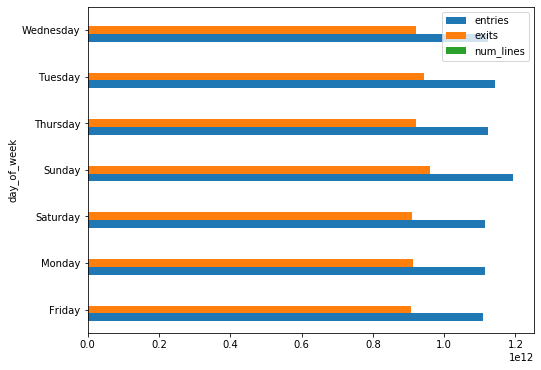

In [50]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh',figsize=(8,6))
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [51]:
grouped.head()

,entries,exits,num_lines
day_of_week,,,
Friday,1110224700078,906799065337,75573
Monday,1114237052454,911938153513,76110
Saturday,1115661545514,909142081474,74725
Sunday,1192306179082,959223750461,75306
Thursday,1122723988662,920691927110,76607


In [52]:
# Reset the index of grouped
grouped.reset_index(inplace=True)

# Print the first five rows of grouped
grouped.head()

,day_of_week,entries,exits,num_lines
0,Friday,1110224700078,906799065337,75573
1,Monday,1114237052454,911938153513,76110
2,Saturday,1115661545514,909142081474,74725
3,Sunday,1192306179082,959223750461,75306
4,Thursday,1122723988662,920691927110,76607


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [58]:
# Use this dictionary to create a new column 
weekend_map = {'Monday':False, 'Tuesday':False, 'Wednesday':False, 'Thursday':False, 'Friday':False, 'Saturday':True, 'Sunday':True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)
grouped[['is_weekend','day_of_week']].head()

,is_weekend,day_of_week
0,False,Friday
1,False,Monday
2,True,Saturday
3,True,Sunday
4,False,Thursday


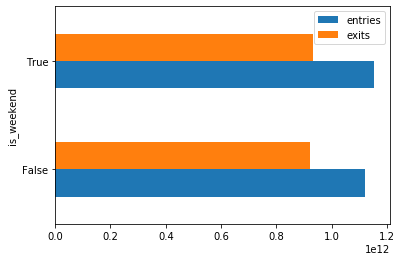

In [57]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').mean()
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [63]:
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines', 'day_of_week'],
      dtype='object')

In [66]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(['c/a','scp'],axis=1)
df.head(2)

,unit,station,linename,division,date,time,desc,entries,exits,num_lines,day_of_week
0,R051,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,R051,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [67]:
df.head(10)

,unit,station,linename,division,date,time,desc,entries,exits,num_lines,day_of_week
0,R051,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,R051,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,R051,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,R051,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,R051,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday
5,R051,59 ST,NQR456W,BMT,2018-08-25,20:00:00,REGULAR,6736562,2283425,7,Saturday
6,R051,59 ST,NQR456W,BMT,2018-08-26,00:00:00,REGULAR,6736683,2283460,7,Sunday
7,R051,59 ST,NQR456W,BMT,2018-08-26,04:00:00,REGULAR,6736696,2283461,7,Sunday
8,R051,59 ST,NQR456W,BMT,2018-08-26,08:00:00,REGULAR,6736705,2283483,7,Sunday
9,R051,59 ST,NQR456W,BMT,2018-08-26,12:00:00,REGULAR,6736746,2283524,7,Sunday


In [ ]:
# raw data is cumulative 

## Summary

Great! You practiced your data cleanup skills using Pandas.